## Task 1

1.Використовуючи датасет з файлу train.csv, побудуйте діаграми розподілу для значень з поля «Age».

In [6]:
import pandas as pd

In [121]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.shape

(891, 12)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [10]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable


In [50]:
age_array = np.array([df['Age'].dropna()]).reshape(-1, 1)
age_array[:10]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.]])

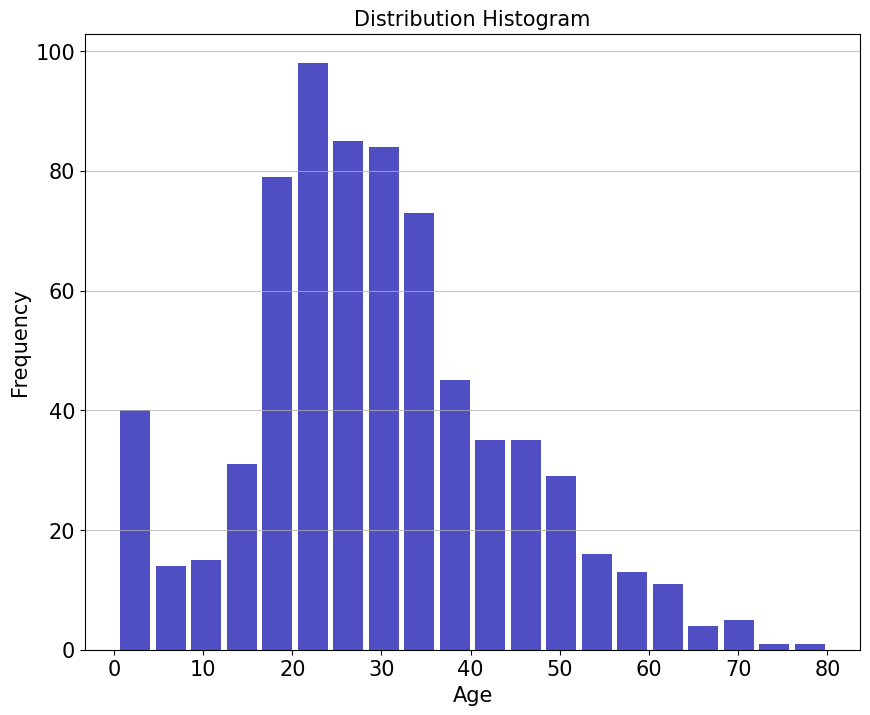

In [52]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(x=age_array, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution Histogram',fontsize=15)
plt.show()

In [53]:
hist,bin_edges = np.histogram(age_array)

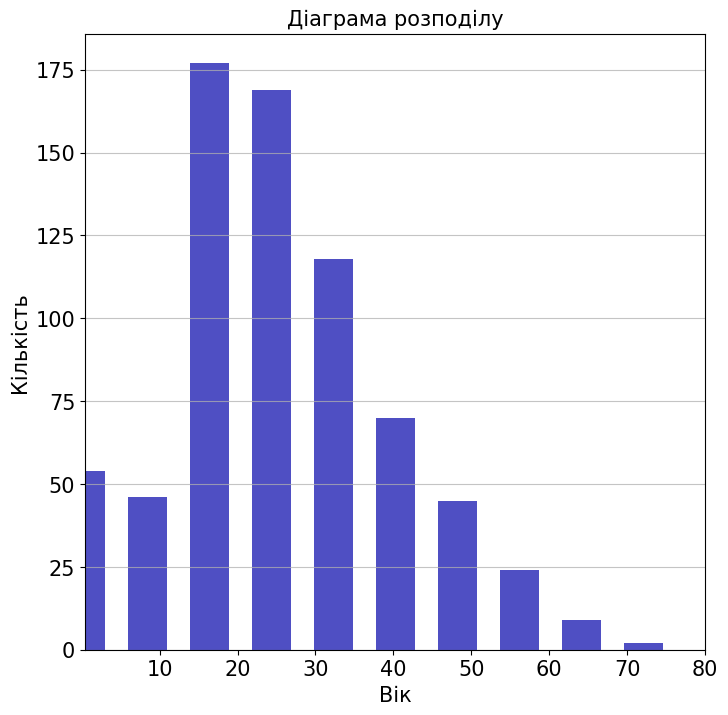

In [54]:
plt.figure(figsize=[8,8])

plt.bar(bin_edges[:-1], hist, width = 5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Вік',fontsize=15)
plt.ylabel('Вік',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Кількість',fontsize=15)
plt.title('Діаграма розподілу',fontsize=15)
plt.show()

C:\Users\HEWLLET\AppData\Local\Temp\ipykernel_9196\2744635766.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sb.distplot(age_array,


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Frequency')]

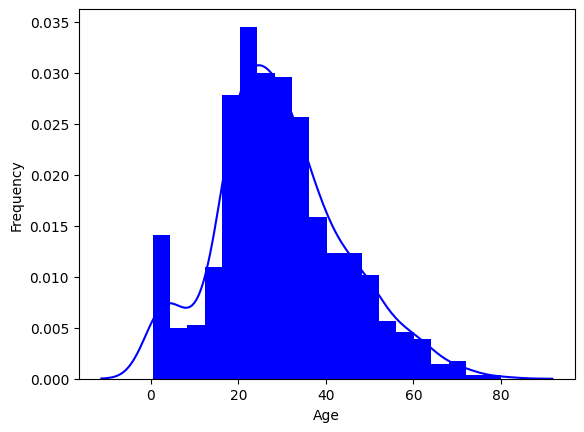

In [71]:
import seaborn as sb


ax = sb.distplot(age_array,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Age', ylabel='Frequency')

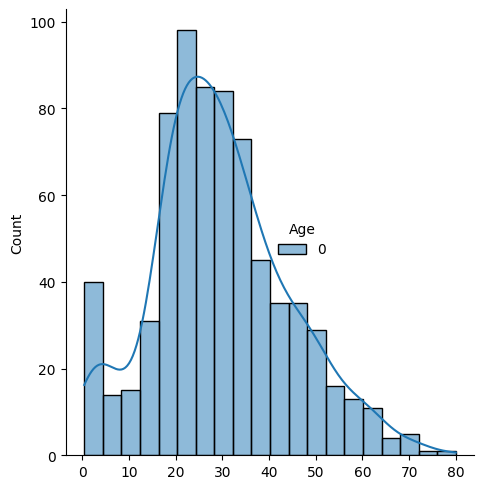

In [81]:
sb_plot = sb.displot(data=age_array, kde=True)
sb.move_legend(sb_plot, "lower center", bbox_to_anchor=(.55, .45), title='Age')

## Task 2

2.Заповніть пропущені значення в датасеті з файлу train.csv. Обґрунтуйте вибір способу заповнення пропущених значень.

In [84]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [86]:
missing_data = df.isnull()
missing_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


In [87]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [100]:
_df = df.drop(['Name', 'Sex','Ticket','Cabin','Embarked'], axis=1)
_df.groupby(_df['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [101]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [102]:
df.groupby(['Pclass']) ['Survived'].value_counts(normalize=True)

Pclass  Survived
1       1           0.629630
        0           0.370370
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: proportion, dtype: float64

In [104]:
df['Age_NaN'] = np.where(df['Age'].isnull(), 0,1)
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NaN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0


In [106]:
df.groupby(['Age_NaN']) ['Survived'].value_counts(normalize=True)

Age_NaN  Survived
0        0           0.706215
         1           0.293785
1        0           0.593838
         1           0.406162
Name: proportion, dtype: float64

In [107]:
df.groupby(['Age_NaN','Pclass']) ['Survived'].value_counts(normalize=True)

Age_NaN  Pclass  Survived
0        1       0           0.533333
                 1           0.466667
         2       0           0.636364
                 1           0.363636
         3       0           0.750000
                 1           0.250000
1        1       1           0.655914
                 0           0.344086
         2       0           0.520231
                 1           0.479769
         3       0           0.760563
                 1           0.239437
Name: proportion, dtype: float64

In [108]:
pd.crosstab(df['Pclass'], df['Age_NaN'])

Age_NaN,0,1
Pclass,,
1,30,186
2,11,173
3,136,355


In [109]:
df.groupby(['Age_NaN','Sex']) ['Survived'].value_counts(normalize=True)

Age_NaN  Sex     Survived
0        female  1           0.679245
                 0           0.320755
         male    0           0.870968
                 1           0.129032
1        female  1           0.754789
                 0           0.245211
         male    0           0.794702
                 1           0.205298
Name: proportion, dtype: float64

In [110]:
pd.crosstab(df['Sex'], df['Age_NaN'])

Age_NaN,0,1
Sex,,
female,53,261
male,124,453


In [127]:
df['Age'].fillna(df['Age'].mean(), inplace = True) # замінюємо середнім значенням, тому що не доказали що пропущенні 
#значення зроблені не випадково, тому замінюємо це значення у випадковому порядку 

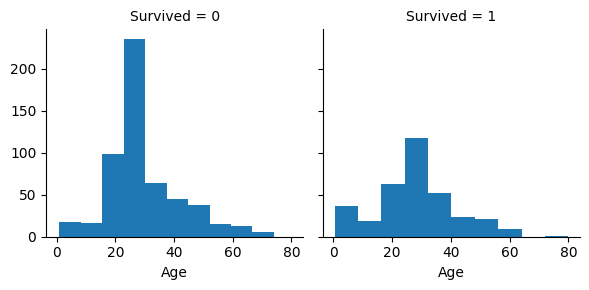

In [113]:
%matplotlib inline

g = sb.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=10)
# розподіли схожі

In [116]:
df['Cabin_available'] = np.where(df['Cabin'].isnull(), 0,1)
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NaN,Cabin_available
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1,0
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q,0,0


In [117]:
df.groupby(['Cabin_available']) ['Survived'].value_counts(normalize=True)

Cabin_available  Survived
0                0           0.700146
                 1           0.299854
1                1           0.666667
                 0           0.333333
Name: proportion, dtype: float64

<Axes: xlabel='Cabin_available'>

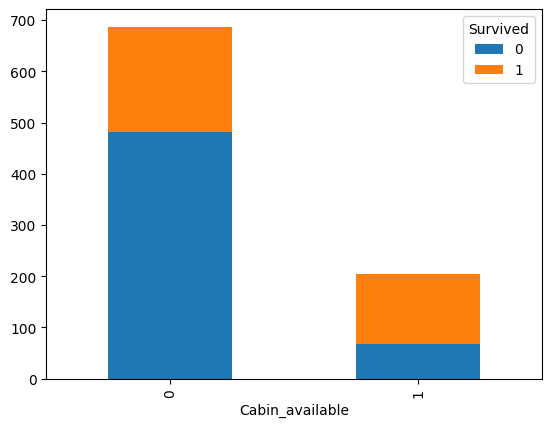

In [118]:
df.pivot_table(
  'PassengerId', 'Cabin_available', 'Survived', 'count').plot(
  kind='bar', stacked=True)

In [122]:
df.drop(['Cabin'], axis = 1, inplace = True) #значення виживаємості не залежить від того є запис номера кабінки чи ні, 
#і логічно що інформація про номер кабінки теж не впливає на цільову змінну, то можна видалити цю колонку з датасету 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [123]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [124]:
df['Embarked'].replace(np.nan, 'S', inplace = True)#замінюємо медіанним значенням томущо S присутне в колонці значно частіше 
#інших категорій, що присутні в даній змінній
df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [128]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64